In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression# r2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.datasets import make_classification
# import accuracy metric from sklearn
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
dataset=pd.read_csv("multipleChoiceResponses_cleaned.csv")
dataset

,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,...,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - Online learning platforms and MOOCs:,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - In-person bootcamps:,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions,How do you perceive the importance of the following topics? - Reproducibility in data science,What metrics do you or your organization use to determine whether or not your models were successful? (Select all that apply) - Other - Text,What tools and methods do you use to make your work easy to reproduce? (Select all that apply) - Other - Text,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Other - Text,over_100k
0,434.0,Male,-1,34.0,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,Slightly worse,No opinion; I do not know,Independent projects are equally important as ...,NaN,NaN,NaN,-1,-1,-1,0
1,718.0,Female,-1,34.0,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,Slightly worse,Slightly better,Independent projects are equally important as ...,Very important,Very important,Very important,-1,-1,-1,0
2,731.0,Male,-1,24.0,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,Slightly better,Much better,Independent projects are slightly more importa...,Not at all important,Slightly important,Very important,-1,-1,-1,0
3,1142.0,Male,-1,29.0,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,-1,Computers/Technology,...,No opinion; I do not know,No opinion; I do not know,Independent projects are slightly less importa...,Very important,Very important,Very important,-1,-1,-1,0
4,959.0,Male,-1,39.0,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,Slightly better,Neither better nor worse,Independent projects are much more important t...,Slightly important,Slightly important,Very important,-1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20084,93.0,Male,-1,44.0,Germany,Master’s degree,"Computer science (software engineering, etc.)",Consultant,-1,Shipping/Transportation,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0
20085,820.0,Female,-1,21.0,India,Master’s degree,"Computer science (software engineering, etc.)",Data Analyst,-1,I am a student,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0
20086,348.0,Male,-1,34.0,Turkey,Doctoral degree,"Computer science (software engineering, etc.)",Research Assistant,-1,Academics/Education,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0
20087,575.0,Male,-1,49.0,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,Na

DATA CLEANING

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20089 entries, 0 to 20088
Data columns (total 72 columns):
 #   Column                                                                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                             --------------  -----  
 0   Duration (in seconds)                                                                                                                                                                                                              20089 non-null  float64
 1   What is your gender? - Selected Choice                                                                                

In [4]:
dataset=dataset.loc[:, ~dataset.columns.str.contains('Other - Text')]
dataset=dataset.loc[:, ~dataset.columns.str.contains('Text')]
dataset

,Duration (in seconds),What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,How many years of experience do you have in your current role?,Does your current employer incorporate machine learning methods into their business?,...,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - University,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Kaggle competitions,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Other,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - Online learning platforms and MOOCs:,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - In-person bootcamps:,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions,How do you perceive the importance of the following topics? - Reproducibility in data science,over_100k
0,434.0,Male,34.0,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,10.0,No (we do not use ML methods),...,NaN,NaN,NaN,Slightly worse,No opinion; I do not know,Independent projects are equally important as ...,NaN,NaN,NaN,0
1,718.0,Female,34.0,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,1.0,I do not know,...,100.0,0.0,0.0,Slightly worse,Slightly better,Independent projects are equally important as ...,Very important,Very important,Very important,0
2,731.0,Male,24.0,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,1.0,I do not know,...,20.0,0.0,0.0,Slightly better,Much better,Independent projects are slightly more importa...,Not at all important,Slightly important,Very important,0
3,1142.0,Male,29.0,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,Computers/Technology,1.0,We are exploring ML methods (and may one day p...,...,0.0,30.0,0.0,No opinion; I do not know,No opinion; I do not know,Independent projects are slightly less importa...,Very important,Very important,Very important,0
4,959.0,Male,39.0,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,15.0,No (we do not use ML methods),...,0.0,0.0,0.0,Slightly better,Neither better nor worse,Independent projects are much more important t...,Slightly important,Slightly important,Very important,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20084,93.0,Male,44.0,Germany,Master’s degree,"Computer science (software engineering, etc.)",Consultant,Shipping/Transportation,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
20085,820.0,Female,21.0,India,Master’s degree,"Computer science (software engineering, etc.)",Data Analyst,I am a student,2.0,I do not know,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
20086,348.0,Male,34.0,Turkey,Doctoral degree,"Computer science (software engineering, etc.)",Research Assis

In [5]:
dataset.isnull()

,Duration (in seconds),What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,How many years of experience do you have in your current role?,Does your current employer incorporate machine learning methods into their business?,...,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - University,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Kaggle competitions,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Other,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - Online learning platforms and MOOCs:,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - In-person bootcamps:,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions,How do you perceive the importance of the following topics? - Reproducibility in data science,over_100k
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20084,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,False
20085,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
20086,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,False
20087,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


Use one hot encoding on the categorical features.

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20089 entries, 0 to 20088
Data columns (total 38 columns):
 #   Column                                                                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                             --------------  -----  
 0   Duration (in seconds)                                                                                                                                                                                                              20089 non-null  float64
 1   What is your gender? - Selected Choice                                                                                

In [8]:
dataset.drop('What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',axis=1,inplace=True)
dataset.drop('What specific programming language do you use most often? - Selected Choice',axis=1,inplace=True)
dataset.drop('During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Gathering data',axis=1,inplace=True)
dataset.drop('During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Cleaning data',axis=1,inplace=True)
dataset.drop('How do you perceive the importance of the following topics? - Reproducibility in data science',axis=1,inplace=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20089 entries, 0 to 20088
Data columns (total 33 columns):
 #   Column                                                                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                             --------------  -----  
 0   Duration (in seconds)                                                                                                                                                                                                              20089 non-null  float64
 1   What is your gender? - Selected Choice                                                                                

In [10]:
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13482 entries, 1 to 20076
Data columns (total 33 columns):
 #   Column                                                                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                             --------------  -----  
 0   Duration (in seconds)                                                                                                                                                                                                              13482 non-null  float64
 1   What is your gender? - Selected Choice                                                                                     

In [11]:
object_columns=dataset.select_dtypes(include=object)
object_columns

,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,Does your current employer incorporate machine learning methods into their business?,What is the primary tool that you use at work or school to analyze data? (include text response) - Selected Choice,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,Do you consider yourself to be a data scientist?,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - Online learning platforms and MOOCs:,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - In-person bootcamps:,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions
1,Female,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,I do not know,Local or hosted development environments (RStu...,Python,Definitely yes,Slightly worse,Slightly better,Independent projects are equally important as ...,Very important,Very important
2,Male,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,I do not know,"Advanced statistical software (SPSS, SAS, etc.)",R,Maybe,Slightly better,Much better,Independent projects are slightly more importa...,Not at all important,Slightly important
3,Male,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,Computers/Technology,We are exploring ML methods (and may one day p...,Local or hosted development environments (RStu...,Python,Maybe,No opinion; I do not know,No opinion; I do not know,Independent projects are slightly less importa...,Very important,Very important
4,Male,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",R,Probably not,Slightly better,Neither better nor worse,Independent projects are much more important t...,Slightly important,Slightly important
5,Male,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,"We recently started using ML methods (i.e., mo...",Local or hosted development environments (RStu...,Python,Probably not,Slightly better,Slightly better,Independent projects are slightly more importa...,Very important,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20060,Male,India,Bachelor’s degree,"Computer science (software engineering, etc.)",DBA/Database Engineer,Insurance/Risk Assessment,No (we do not use ML methods),Other,Python,Probably not,Slightly better,Much better,Independent projects are much more important t...,Very important,Very important
20065,Male,Ukraine,Master’s degree,"Information technology, networking, or system ...",Manager,Computers/Technology,I do not know,"Basic statistical software (Microsoft Excel, G...",Python,Probably not,No opinion; I do not know,No opinion; I do not know,Independent projects are much more important t...,Very important,Very important
20068,Male,Pakistan,Bachelor’s degree,"Computer science (software engineering, etc.)",Software Engineer,Computers/Techno

In [12]:
df_one_hot=pd.get_dummies(object_columns,prefix=object_columns.columns)
df_one_hot

,What is your gender? - Selected Choice_Female,What is your gender? - Selected Choice_Male,What is your gender? - Selected Choice_Prefer not to say,What is your gender? - Selected Choice_Prefer to self-describe,In which country do you currently reside?_Argentina,In which country do you currently reside?_Australia,In which country do you currently reside?_Austria,In which country do you currently reside?_Bangladesh,In which country do you currently reside?_Belarus,In which country do you currently reside?_Belgium,...,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:_Independent projects are slightly more important than academic achievements,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:_No opinion; I do not know,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_No opinion; I do not know,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_Not at all important,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_Slightly important,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_Very important,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_No opinion; I do not know,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_Not at all important,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_Slightly important,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_Very important
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20060,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
20065,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
20068,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
20069,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [13]:
df=pd.concat([dataset,df_one_hot],axis=1)
df.drop(object_columns.columns,axis=1,inplace=True)
df

,Duration (in seconds),What is your age (# years)?,How many years of experience do you have in your current role?,Approximately what percent of your time at work or school is spent actively coding?,How long have you been writing code to analyze data?,For how many years have you used machine learning methods (at work or in school)?,"During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Visualizing data","During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Model building/model selection","During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Putting the model into production","During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Finding insights in the data and communicating with stakeholders",...,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:_Independent projects are slightly more important than academic achievements,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:_No opinion; I do not know,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_No opinion; I do not know,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_Not at all important,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_Slightly important,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_Very important,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_No opinion; I do not know,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_Not at all important,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_Slightly important,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_Very important
1,718.0,34.0,1.0,87.0,10.0,1.0,20.0,50.0,20.0,0.0,...,False,False,False,False,False,True,False,False,False,True
2,731.0,24.0,1.0,87.0,10.0,3.0,20.0,10.0,20.0,23.0,...,True,False,False,True,False,False,False,False,True,False
3,1142.0,29.0,1.0,62.0,5.0,1.0,13.0,30.0,10.0,0.0,...,False,False,False,False,False,True,False,False,False,True
4,959.0,39.0,15.0,37.0,1.0,1.0,50.0,0.0,0.0,20.0,...,False,False,False,False,True,False,False,False,True,False
5,1758.0,21.0,1.0,87.0,1.0,1.0,20.0,20.0,5.0,5.0,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20060,872.0,29.0,4.0,37.0,5.0,0.0,20.0,25.0,10.0,15.0,...,False,False,False,False,False,True,False,False,False,True
20065,907.0,44.0,3.0,0.0,2.0,0.0,5.0,0.0,0.0,35.0,...,False,False,False,False,False,True,False,False,False,True
20068,697.0,29.0,2.0,62.0,2.0,1.0,20.0,5.0,20.0,10.0,...,True,False,False,False,True,False,False,False,False,True
20069,940.0,39.0,15.0,13.0,30.0,10.0,40.0,10.0,0.0,10.0,...,False,False,False,False,False,True,False,False,False,True


2.Train a random forest classifier using all the features that we processed.

In [14]:
#  import random forest
from sklearn.ensemble import RandomForestClassifier

In [15]:
X=df.drop(['over_100k'],axis=1)
y=df['over_100k']
y.shape
# take only a sample of the dataset created
X=X.sample(frac=0.3,random_state=42)
y=y.sample(frac=0.3,random_state=42)

In [16]:
#X test is the 25% of rows the rest 75% is the training test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [17]:
# call the random forest and initialise it
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
#  fit the random forest in the train dataset
rf.fit(X_train, y_train)

# predict the labels of the test dataset
preds = rf.predict(X_test)
accuracy_score(y_test, preds)

0.8863636363636364

3. Train a random forest classifier selection of the top 20 features using the feature importances from the random forest.

In [18]:
fis = rf.feature_importances_
fis_df = pd.DataFrame(fis)
fis_df.sort_values(by=0, ascending = False)

,0
77,0.101087
1,0.075242
4,0.054349
2,0.045898
5,0.036956
...,...
159,0.000029
52,0.000027
24,0.000006
104,0.000004


In [19]:
from sklearn.inspection import permutation_importance

In [20]:
#fit permutation importance on the trained random forest model as well as X_train and y_train
result = permutation_importance(rf, X_train, y_train)
result

{'importances_mean': array([1.18694362e-03, 4.01582591e-02, 1.89910979e-02, 5.27530498e-04,
        2.05736894e-02, 8.11078140e-03, 1.58259149e-03, 1.31882624e-04,
        3.95647873e-04, 1.45070887e-03, 1.05506100e-03, 1.97823937e-04,
        3.95647873e-04, 1.25288493e-03, 7.25354435e-04, 1.12100231e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.29706561e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.29706561e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.11078140e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00

In [21]:
perm_importances = pd.DataFrame(result.importances_mean)
perm_importances.sort_values(by=0, ascending=False)

,0
77,0.063501
1,0.040158
4,0.020574
2,0.018991
125,0.012463
...,...
94,0.000000
95,0.000000
35,0.000000
97,0.000000


In [22]:
# compare permutation importance and feature importance
merged_importances = perm_importances.merge(fis_df, how='inner', left_index=True, right_index=True)
merged_importances.columns = ['permutation_importance', 'feature_importance']

In [23]:
merged_importances.sort_values(by='feature_importance',ascending=False)

,permutation_importance,feature_importance
77,0.063501,0.101087
1,0.040158,0.075242
4,0.020574,0.054349
2,0.018991,0.045898
5,0.008111,0.036956
...,...,...
159,0.000000,0.000029
52,0.000000,0.000027
24,0.000000,0.000006
104,0.000000,0.000004


In [24]:
#selection of the top 20 features using the feature importances 1st way
merged_importances.sort_values(by='feature_importance',ascending=False).head(20)

,permutation_importance,feature_importance
77,0.063501,0.101087
1,0.040158,0.075242
4,0.020574,0.054349
2,0.018991,0.045898
5,0.008111,0.036956
0,0.001187,0.030206
125,0.012463,0.024834
117,0.009430,0.022959
9,0.001451,0.019046
13,0.001253,0.018870


In [25]:
#  keep the features where feature importance is greater than a threshold (selection of the top 20 features using the feature importances 2st way)
impor_feat = list(merged_importances[merged_importances['feature_importance'] >= 0.008].index)
impor_feat

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 42,
 77,
 86,
 117,
 118,
 125,
 140]

In [26]:
len(impor_feat)

23

In [27]:
# retrain a random forest only for important features
rf_red = RandomForestClassifier()
rf_red.fit(X_train.iloc[:,impor_feat], y_train)
preds_red = rf_red.predict(X_test.iloc[:,impor_feat])
accuracy_score(y_test, preds_red)

0.892292490118577

4. Do you face any imbalanced class issues? If yes, use upsampling/ downsampling to fix this.

Dataset Imbalance

In [28]:
y_train.value_counts()

over_100k
0    2575
1     458
Name: count, dtype: int64

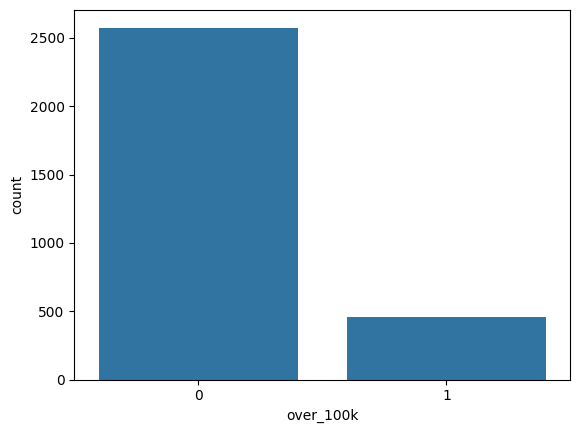

In [29]:
sns.countplot(x=y_train)
None

Try to fix dataset imbalance with Downsampling the X-train

In [30]:
df_new=pd.concat([X_train,y_train],axis=1)
df_new

,Duration (in seconds),What is your age (# years)?,How many years of experience do you have in your current role?,Approximately what percent of your time at work or school is spent actively coding?,How long have you been writing code to analyze data?,For how many years have you used machine learning methods (at work or in school)?,"During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Visualizing data","During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Model building/model selection","During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Putting the model into production","During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Finding insights in the data and communicating with stakeholders",...,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:_No opinion; I do not know,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_No opinion; I do not know,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_Not at all important,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_Slightly important,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_Very important,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_No opinion; I do not know,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_Not at all important,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_Slightly important,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_Very important,over_100k
19494,1554.0,29.0,1.0,87.0,1.0,1.0,45.0,10.0,10.0,10.0,...,False,True,False,False,False,False,False,False,True,0
6105,34911.0,39.0,10.0,100.0,10.0,2.0,20.0,10.0,10.0,10.0,...,False,False,False,False,True,False,False,False,True,1
5762,2061.0,44.0,25.0,37.0,10.0,1.0,30.0,30.0,10.0,10.0,...,False,False,False,True,False,False,False,True,False,1
1309,675.0,39.0,2.0,62.0,5.0,2.0,5.0,15.0,15.0,10.0,...,False,False,False,False,True,False,True,False,False,0
3244,729.0,39.0,5.0,87.0,10.0,10.0,10.0,30.0,5.0,5.0,...,False,False,False,True,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,4051.0,29.0,4.0,62.0,2.0,3.0,5.0,35.0,10.0,20.0,...,False,False,False,True,False,False,False,False,True,0
6297,953.0,24.0,1.0,62.0,2.0,2.0,20.0,0.0,0.0,25.0,...,False,False,False,True,False,False,False,False,True,0
1335,1513.0,29.0,2.0,87.0,2.0,2.0,30.0,20.0,5.0,5.0,...,False,False,False,True,False,False,False,False,True,0
6611,803.0,69.0,3.0,37.0,40.0,3.0,10.0,10.0,10.0,10.0,...,False,False,False,False,True,False,False,True,False,1


In [31]:
data_down=df_new.groupby('over_100k').apply(lambda x: x.sample(n=458, random_state=0)).reset_index(drop=True)

In [32]:
data_down['over_100k'].value_counts()

over_100k
0    458
1    458
Name: count, dtype: int64

In [33]:
X_train_down=data_down.drop('over_100k',axis=1)
y_train_down=data_down['over_100k']

# call the random forest and initialise it
rf_down=RandomForestClassifier()
#  fit the random forest in the train dataset
rf_down.fit(X_train_down, y_train_down)
# predict the labels of the test dataset
preds_down = rf_down.predict(X_test)
accuracy_score(y_test, preds_down)

0.8073122529644269

In [34]:
print(classification_report(y_test, preds_down))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       859
           1       0.43      0.86      0.57       153

    accuracy                           0.81      1012
   macro avg       0.70      0.83      0.72      1012
weighted avg       0.89      0.81      0.83      1012



Train the y_train_down but with the 20 highest significant features

In [35]:
df_new2=pd.concat([X_train_down,y_train_down],axis=1)
df_new2

,Duration (in seconds),What is your age (# years)?,How many years of experience do you have in your current role?,Approximately what percent of your time at work or school is spent actively coding?,How long have you been writing code to analyze data?,For how many years have you used machine learning methods (at work or in school)?,"During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Visualizing data","During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Model building/model selection","During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Putting the model into production","During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Finding insights in the data and communicating with stakeholders",...,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:_No opinion; I do not know,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_No opinion; I do not know,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_Not at all important,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_Slightly important,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:_Very important,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_No opinion; I do not know,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_Not at all important,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_Slightly important,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions_Very important,over_100k
0,86588.0,54.0,5.0,13.0,2.0,2.0,20.0,20.0,20.0,20.0,...,False,False,False,True,False,False,False,False,True,0
1,1123.0,21.0,1.0,37.0,2.0,1.0,20.0,15.0,5.0,10.0,...,False,False,False,True,False,False,False,True,False,0
2,949.0,29.0,2.0,13.0,2.0,0.0,10.0,10.0,0.0,20.0,...,False,False,False,False,True,False,False,False,True,0
3,4517.0,29.0,3.0,13.0,1.0,0.0,15.0,25.0,15.0,20.0,...,False,False,False,False,True,False,False,True,False,0
4,840.0,39.0,15.0,13.0,20.0,2.0,10.0,20.0,10.0,10.0,...,False,False,False,False,True,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,698.0,49.0,25.0,37.0,2.0,1.0,10.0,30.0,10.0,20.0,...,False,False,False,False,True,False,False,False,True,1
912,1425.0,44.0,15.0,37.0,20.0,2.0,10.0,10.0,5.0,20.0,...,False,False,False,False,True,False,False,False,True,1
913,1417.0,24.0,3.0,62.0,2.0,3.0,30.0,20.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,1
914,3723.0,44.0,1.0,37.0,1.0,1.0,15.0,15.0,10.0,10.0,...,True,True,False,False,False,True,False,False,False,1


In [36]:
df_new2['over_100k'].value_counts()

over_100k
0    458
1    458
Name: count, dtype: int64

In [37]:
X_train_down_20f=df_new2.drop('over_100k',axis=1)
y_train_down_20f=df_new2['over_100k']

In [38]:
y_train_down_20f.value_counts()

over_100k
0    458
1    458
Name: count, dtype: int64

In [39]:
# call the random forest and initialise it
rf_down_20f=RandomForestClassifier()
#  fit the random forest in the train dataset
rf_down_20f.fit(X_train_down_20f, y_train_down_20f)
# predict the labels of the test dataset
preds_down_20f = rf_down_20f.predict(X_test)
accuracy_score(y_test, preds_down_20f)

0.8003952569169961

In [40]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

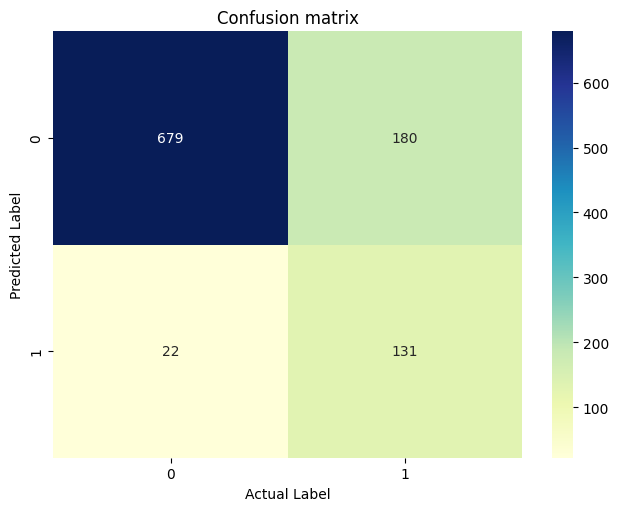

In [41]:
cnf_matrix = metrics.confusion_matrix(y_test,preds_down_20f)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#Create Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot= True, cmap = "YlGnBu", fmt ="g")
plt.tight_layout()
plt.title("Confusion matrix")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
None

In [42]:
print(classification_report(y_test, preds_down_20f))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       859
           1       0.42      0.86      0.56       153

    accuracy                           0.80      1012
   macro avg       0.69      0.82      0.72      1012
weighted avg       0.89      0.80      0.82      1012



5. Compare the random forest feature importance method with the SelectKBest “mutual_info_classif” feature selection method. 
Do you see any performance improvement?

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [44]:
#independent columns are :  
X=df.drop(['over_100k'],axis=1)
#target column :
y=df['over_100k']
#take only a sample of the dataset created
X=X.sample(frac=0.3,random_state=42)
y=y.sample(frac=0.3,random_state=42)


# Select 20 features with highest chi-squared statistics
best20_feat = SelectKBest(chi2, k=20)
fit=best20_feat.fit(X, y)

# Look at scores returned from the selector for each feature
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores=pd.concat([dfscores,dfcolumns],axis=1)
featureScores.columns=['Score','Specs']  #naming the dataframe columns



In [45]:
kbest = np.asarray(featureScores)[fit.get_support()]
kbest

array([[353813.65114497335, 'Duration (in seconds)'],
       [1251.6415782409517, 'What is your age (# years)?'],
       [1638.9479233366908,
        'How many years of experience do you have in your current role?'],
       [3782.3548209633427,
        'How long have you been writing code to analyze data?'],
       [1140.6178272926363,
        'For how many years have you used machine learning methods (at work or in school)?'],
       [60.533166496233434,
        'During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Visualizing data'],
       [86.80412518987738,
        'During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Model building/model selection'],
       [231.70004353708958,
        'During a typical data science project at work or school, approximately what propor

In [46]:
#print 20 best features
featureScores[fit.get_support()]

,Score,Specs
0,353813.651145,Duration (in seconds)
1,1251.641578,What is your age (# years)?
2,1638.947923,How many years of experience do you have in yo...
4,3782.354821,How long have you been writing code to analyze...
5,1140.617827,For how many years have you used machine learn...
6,60.533166,During a typical data science project at work ...
7,86.804125,During a typical data science project at work ...
9,231.700044,During a typical data science project at work ...
10,109.548709,During a typical data science project at work ...
12,256.044198,What percentage of your current machine learni...


In [47]:
importance = pd.Series(rf.feature_importances_, index=list(X))
importance = importance/importance.max()
importance = importance.sort_values(ascending=False).head(20)

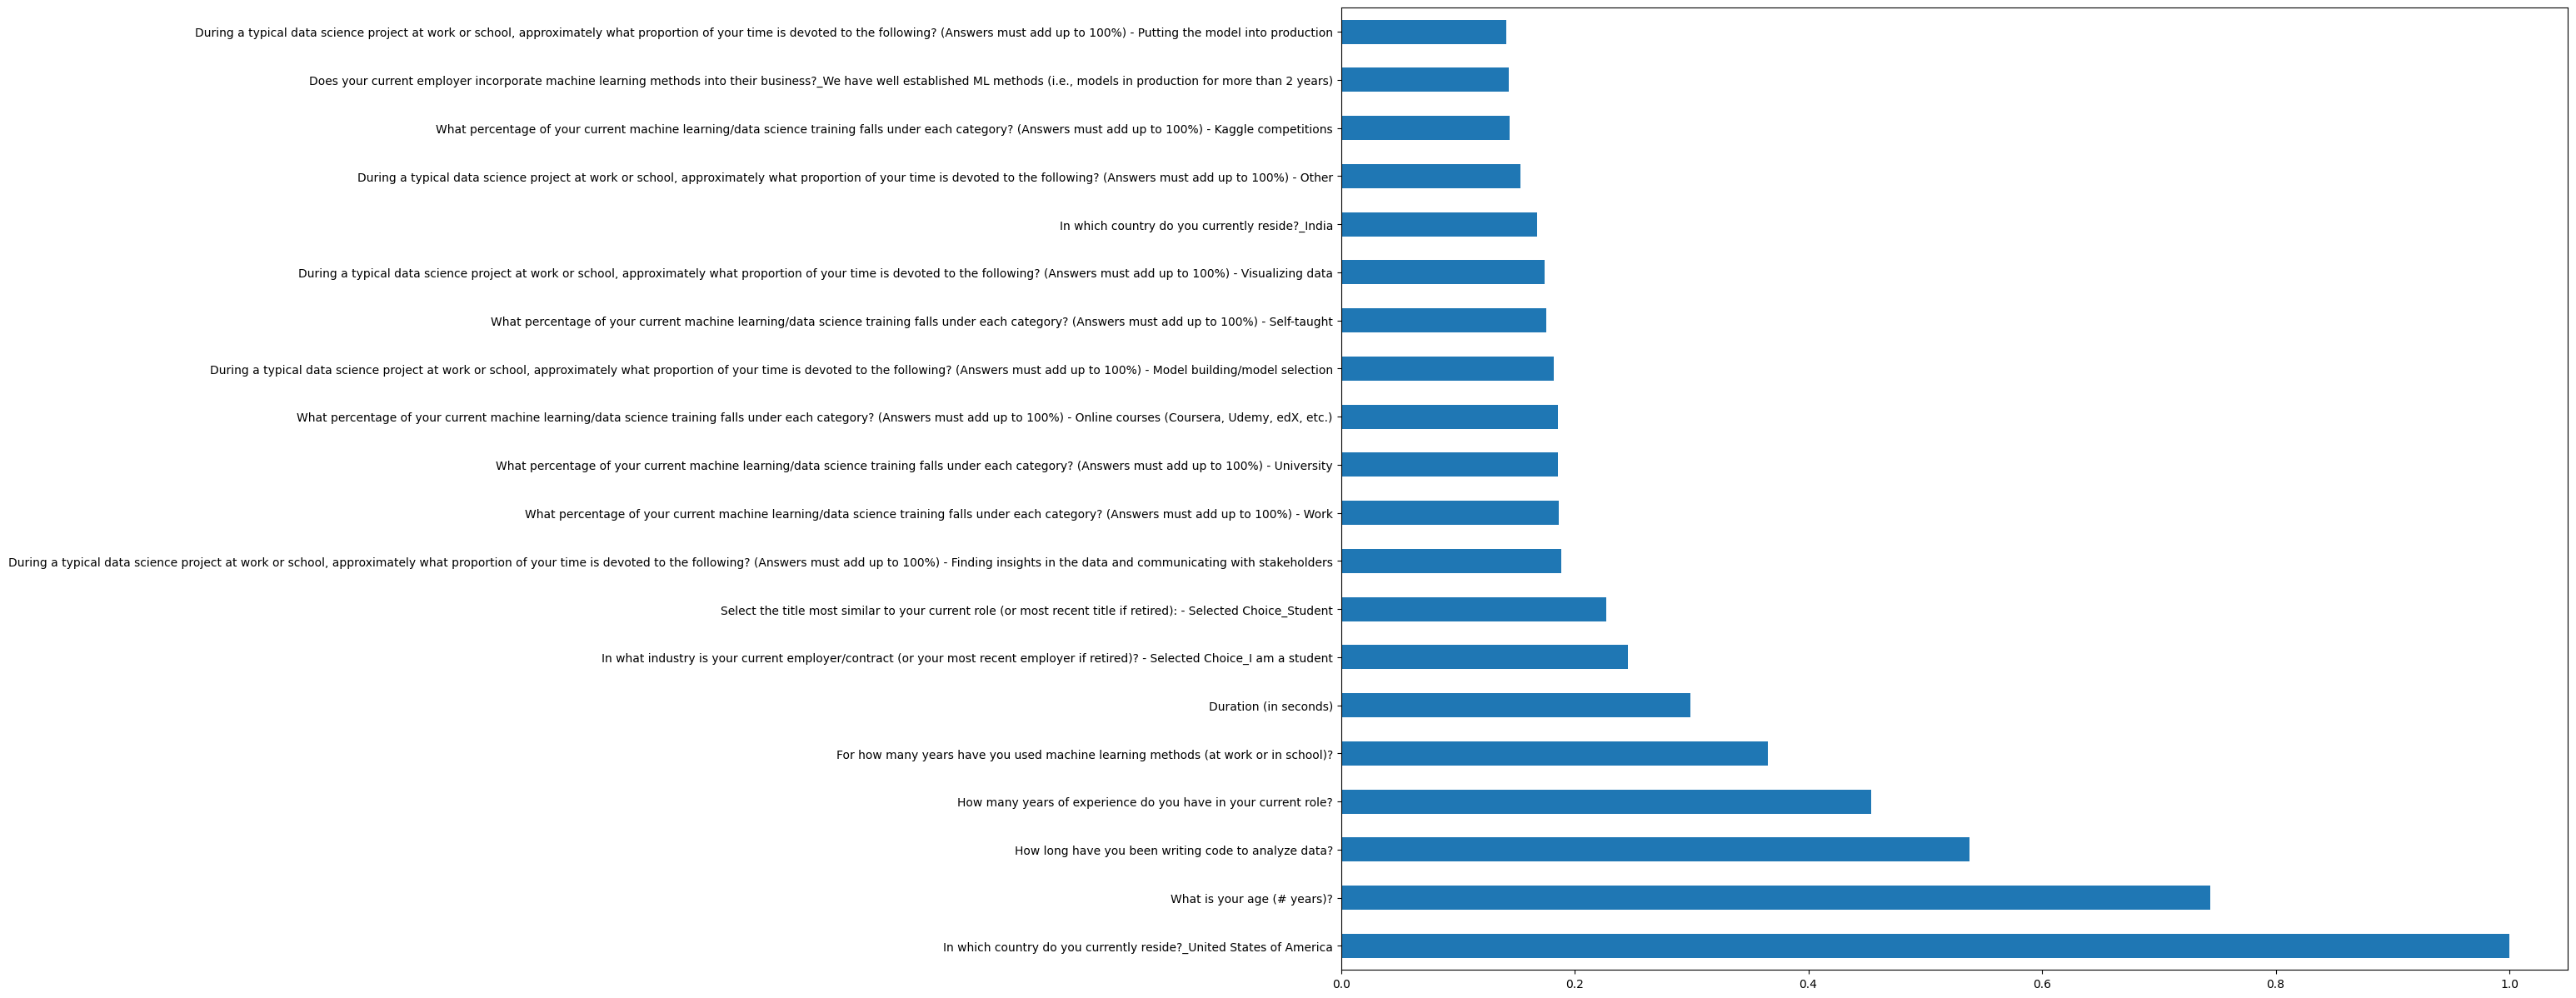

In [48]:
importance.plot.barh(figsize=(19,15))
None